![](https://1.bp.blogspot.com/-umI8KF0zzWY/XZM4o8tkr8I/AAAAAAAAKWs/sQKCWeCDoZIrXx8M05NrKS_GEnNjyvIUgCLcBGAsYHQ/s400/tumblr_ple4kdmuUC1y0yrefo5_400.gif)

# Introduction
The purpose of this kernel is to have a basic understanding of the data and also identify any reason for the price change. A better understanding of these prices will allow us to predict price hikes

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set(rc={'figure.figsize':(11, 4)})

## Overview of data

In [2]:
def overview():
    data = pd.read_csv("../input/agricultural-raw-material-prices-19902020/agricultural_raw_material.csv")
    print("The first 5 rows of data are:\n")
    print(data.head)
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nThe number of null values for each column are: \n")
    print(data.isnull().sum())
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data

# Lastly, assigning a variable to overview()
data = overview()

The first 5 rows of data are:

<bound method NDFrame.head of       Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Pri

### What do we see here?
- We see that price % change is deemed as an object. We will need to fix that by removing the "%" sign.
- We also notice that the percentages of NaN values are significant (more than 5 %). We will drop the NaN values for those columns with 1 NaN value and as for the rest, we will replace them with median value.

In [3]:
# Replacing %, "," and "-"
data = data.replace('%', '', regex=True)
data = data.replace(',', '', regex=True)
data = data.replace('-', '', regex=True)
data = data.replace('', np.nan)
data = data.replace('MAY90', np.nan)

# Dropping rows with NaN values
data = data.dropna()

# Check to see if all NaN values are resolved
data.isnull().sum()

# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
data[lst] = data[lst].astype("float")

data.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [4]:
data.Month  = pd.to_datetime(data.Month.str.upper(), format='%b%y', yearfirst=False)

# Indexing month
data = data.set_index('Month')

## Coarse wool prices

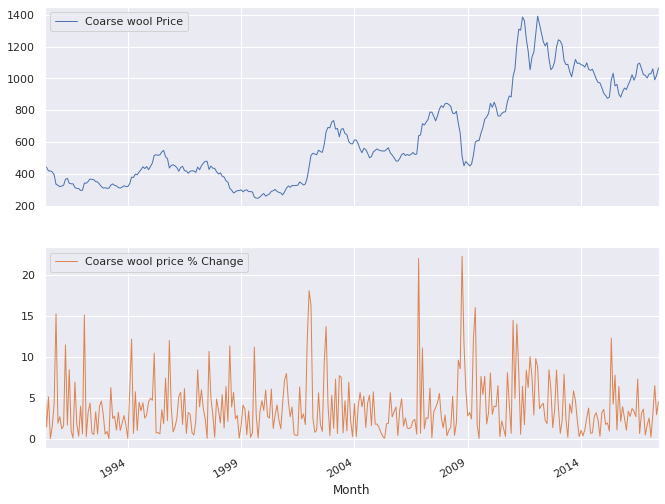

In [5]:
axes = data[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Copra prices 

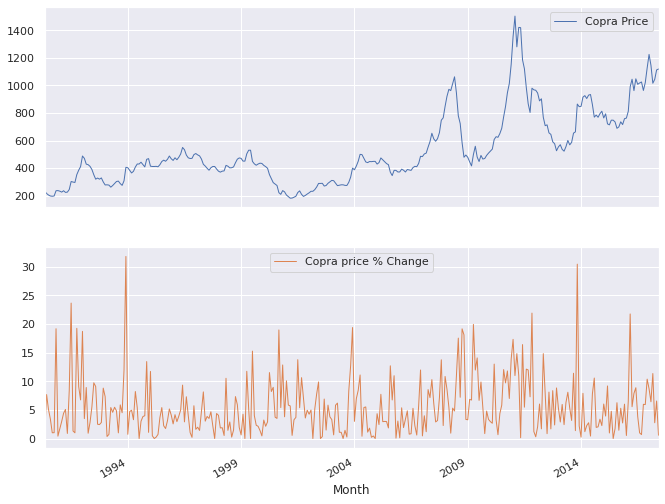

In [6]:
axes = data[["Copra Price", "Copra price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Cotton prices

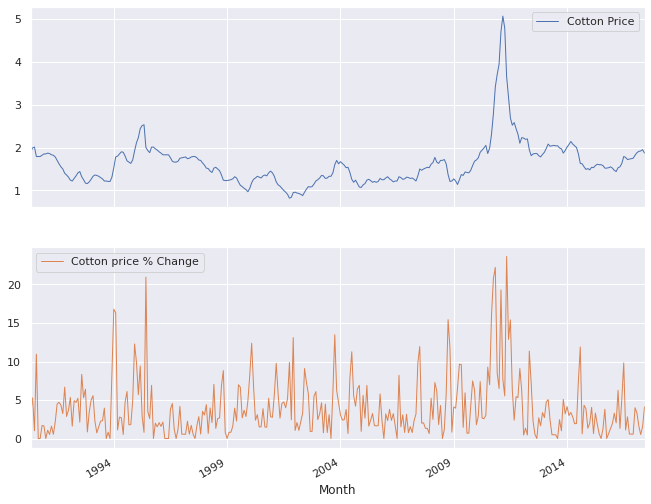

In [7]:
axes = data[["Cotton Price", "Cotton price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Fine wool prices

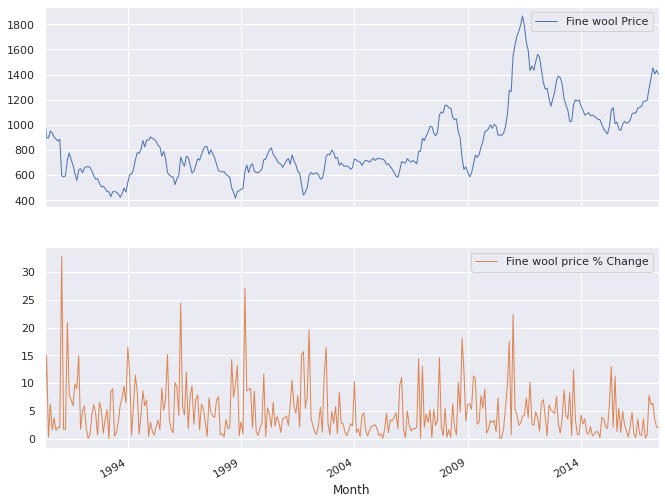

In [8]:
axes = data[["Fine wool Price", "Fine wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Hard log price

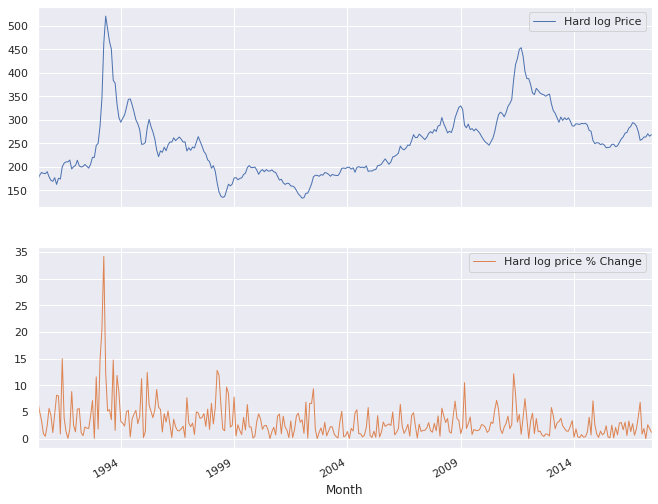

In [9]:
axes = data[["Hard log Price", "Hard log price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Hard sawnwood price

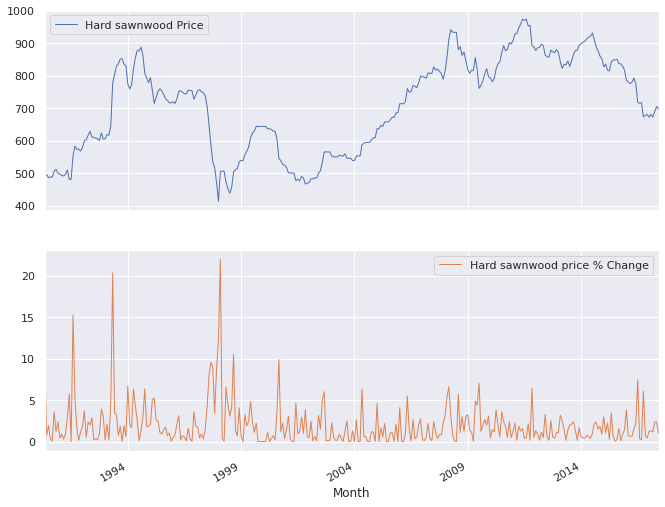

In [10]:
axes = data[["Hard sawnwood Price", "Hard sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Hide price

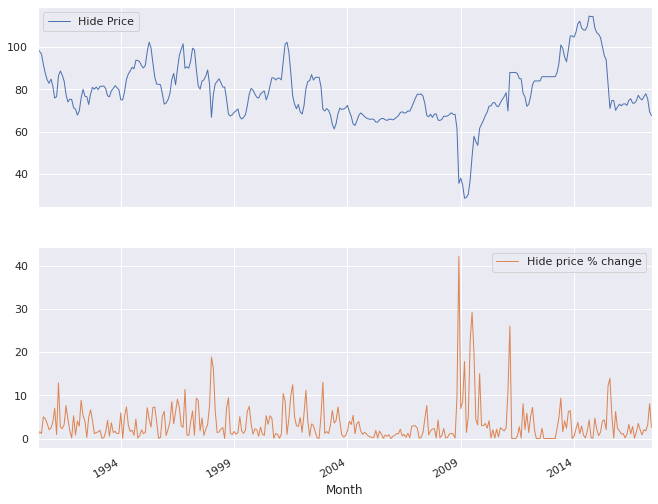

In [11]:
axes = data[["Hide Price", "Hide price % change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Plywood

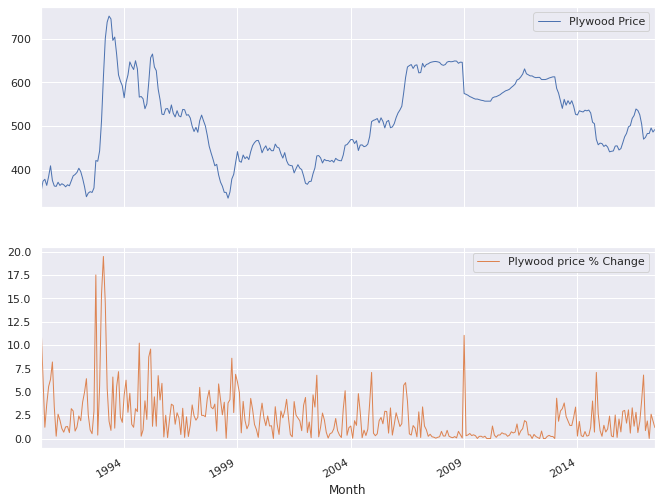

In [12]:
axes = data[["Plywood Price", "Plywood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Rubber prices

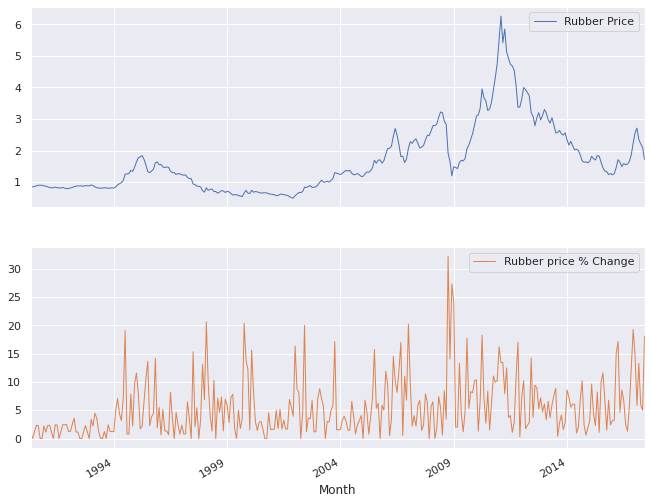

In [13]:
axes = data[["Rubber Price", "Rubber price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Softlog prices

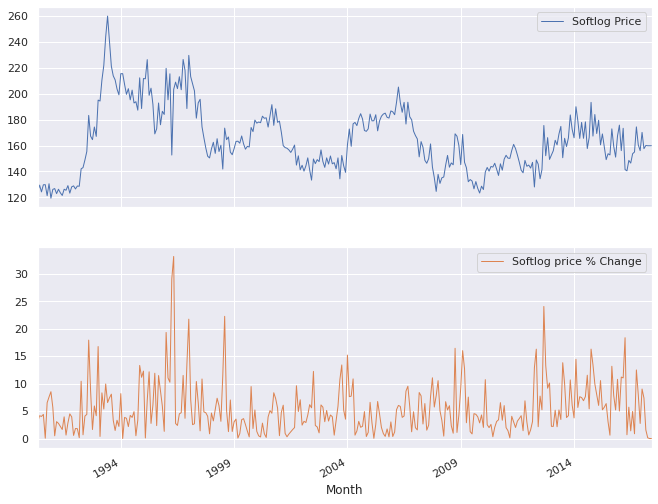

In [14]:
axes = data[["Softlog Price", "Softlog price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Soft sawnwood prices

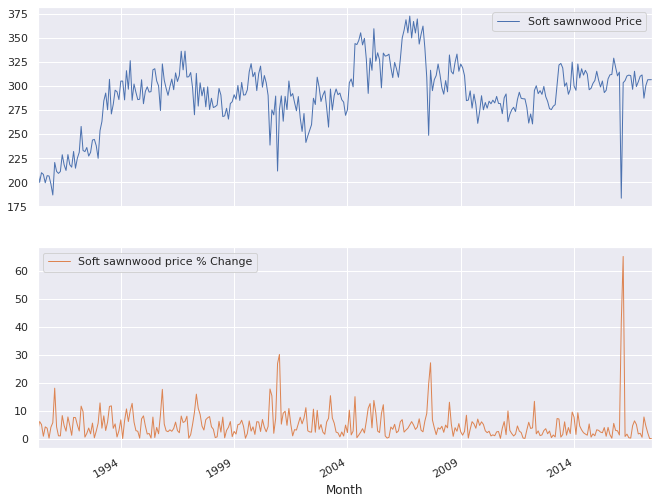

In [15]:
axes = data[["Soft sawnwood Price", "Soft sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Wood pulp

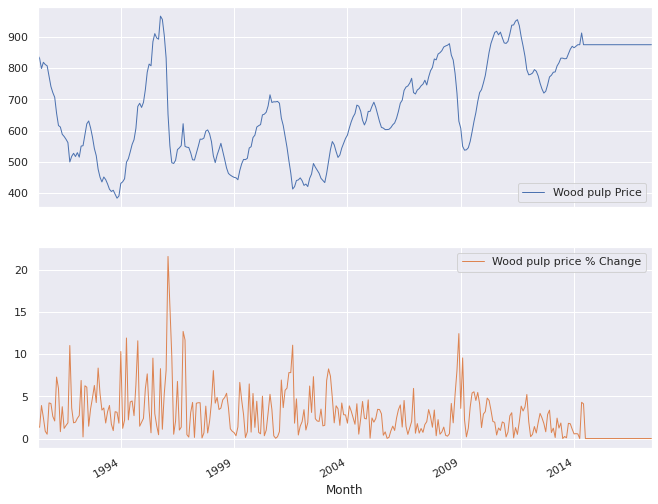

In [16]:
axes = data[["Wood pulp Price", "Wood pulp price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Correlation matrix

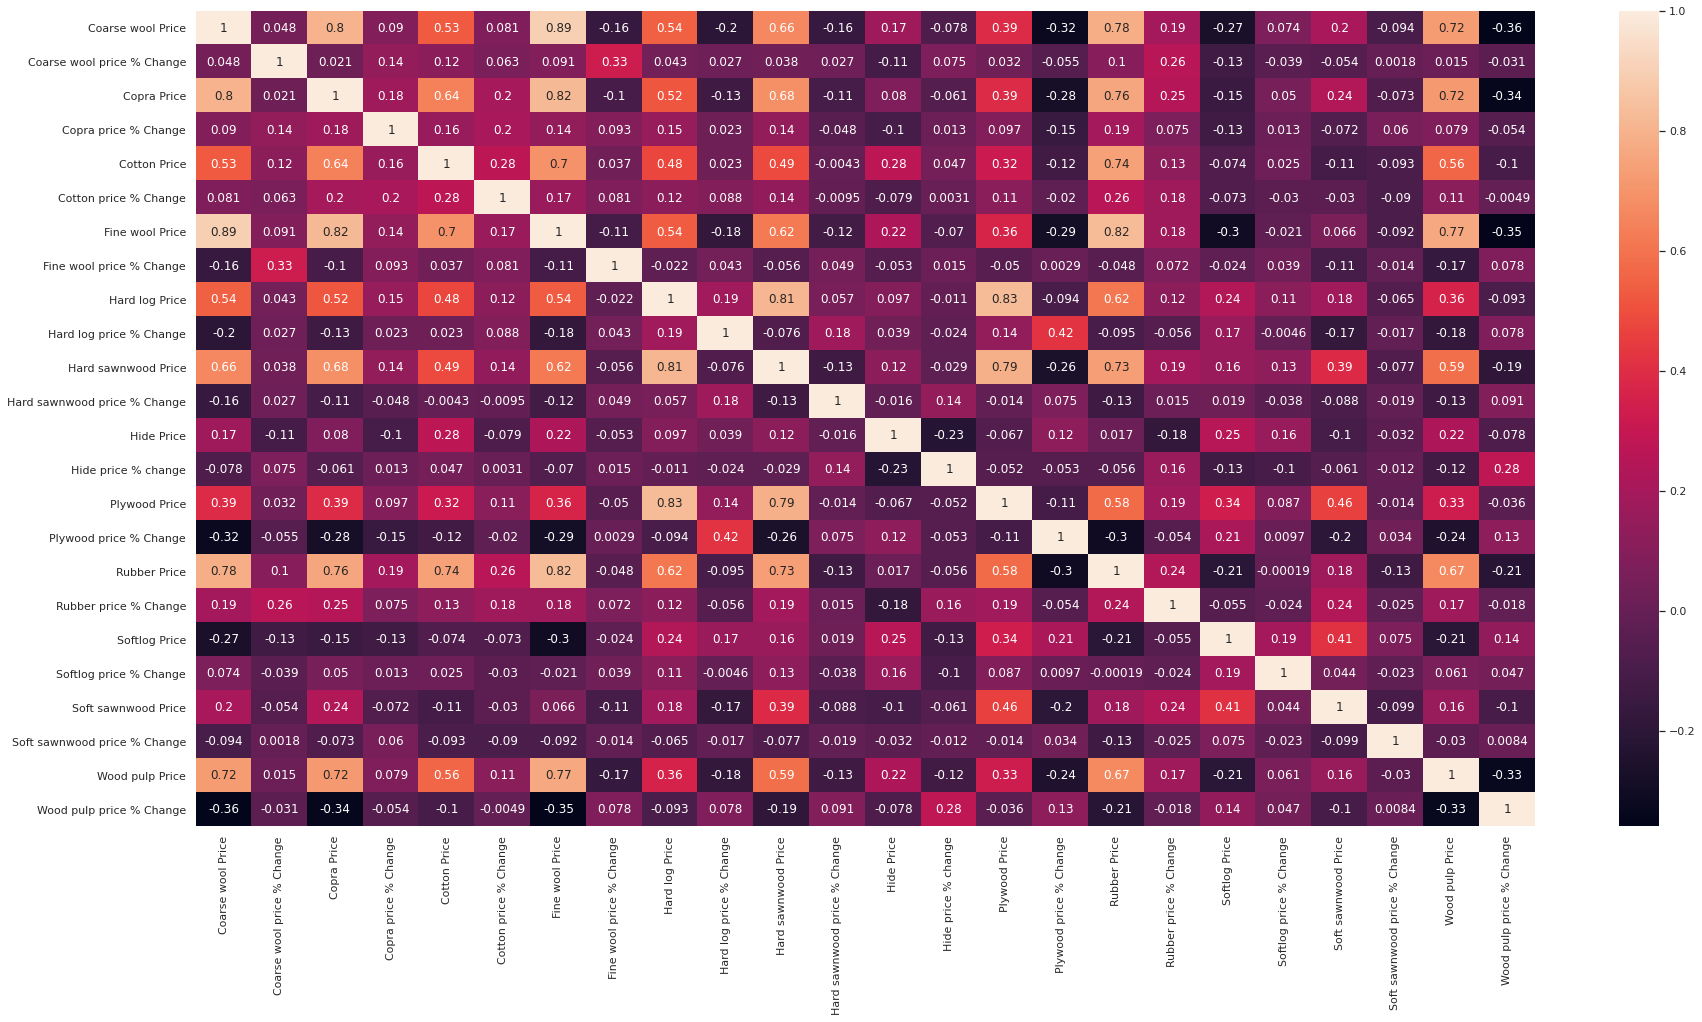

In [17]:
plt.figure(figsize=(30,15))
 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()